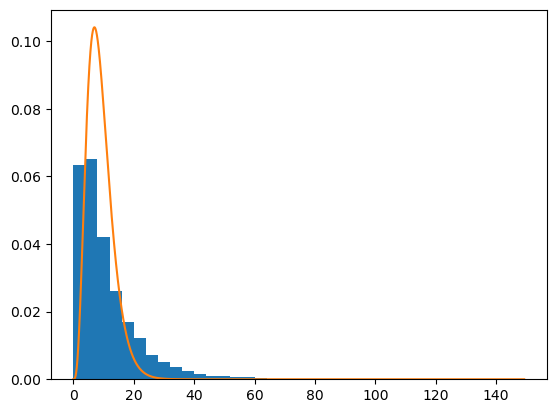

In [28]:
#
# [1] student 정리를 통해본 카이제곱 분포
# - n 개의 표본이 정규분포에서 추출되었다면 s² / δ² * (n - 1) 은 자유도 (n - 1) 인 κ² 을 따름 
#

import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# 표준 정규분포 10,000 개에서 10개씩 샘플을 추출해 histogram 의 빈도를 확률로 변환해 그려봄
n = 10
result = []
for i in range(0, 10000):
    Z = sp.norm.rvs(loc = 0, scale = 1, size = n)
    result = result + [np.var(Z, ddof = 1) ** 2 / 1 * (n - 1)]

# 임의의 값을 chi-square 확률 밀도 함수에 넣어 계산해봄
X = np.arange(0, np.max(result), 0.01)
K = sp.chi2.pdf(X, df = n - 1)

# 두 개를 시각적으로 비교해봄
plt.hist(result, density=True, bins = 25, range = (0, 100))
plt.plot(X, K)
plt.show()

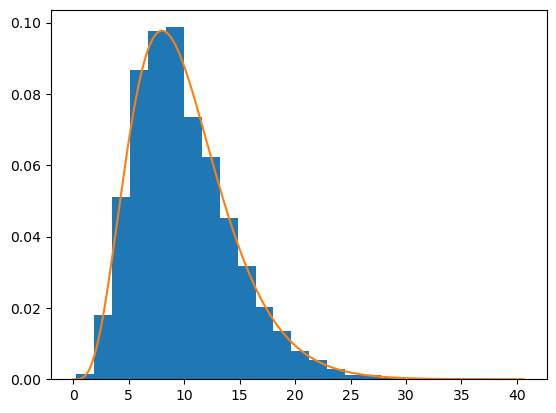

In [51]:
#
# [2] 카이제곱 분포의 특징
# ① 항상 0 보다 큰 값이 나오고 오른쪽으로 치우친 분포 형태
# ② 표준정규분포 확률변수 k 개를 제곱해서 더하면 자유도가 k 인 카이제곱 분포를 따름
#    * 표준정규분포 확률변수 k 개 : 서로 다른 분포에서에서의 확률변수 k 개 
#

# 표준 정규 분포에서 k 를 샘플로 추출해서 이들을 제곱해서 더한 것
# 이것을 10000 개 만들어 빈도를 확률로 계산해봄
k = 10
result = []
for i in range(0, 10000):
    Z = sp.norm.rvs(loc = 0, scale = 1, size = k)
    result = result  + [np.sum(Z ** 2)]

# 위에서 추출된 X 축 범위의 값을 chi-square 확률 밀도함수에 넣어서 구해봄
X = np.arange(0, np.max(result), 0.01)
Y = sp.chi2.pdf(X, df=k)

# 각각 그려봄. 유사함
plt.hist(result, bins = 25, density=True)
plt.plot(X,Y)
plt.show()

In [ ]:
#
# [3] 카이제곱분포를 활용한 검정 
# ① 1 표본 분산 검정 : 데이터(표본)를 발생시키는 모분포의 분산이 특정값과 같은지 검정
# ② 독립성 검정
# ③ 비율 검정
#

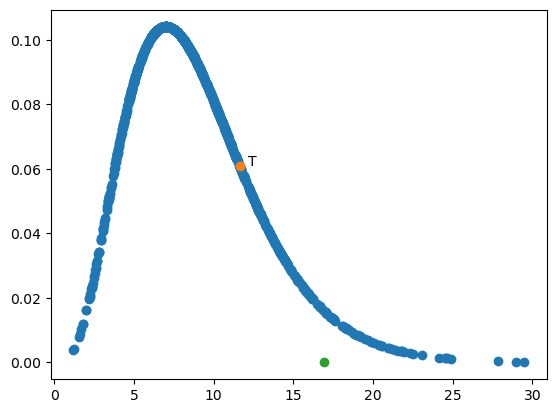

In [18]:
#
# [3 - ①] 1 - 표본 분산 검정 
# → student 정리의 검정통계량이 카이제곱분포상에 어디에 위치하고 유의확률을 구해 유의수준과 비교
#

# 금속 성분 함유량 데이터 ‑ 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고
# 보고 있는데, 제조사별로 차이가 난다고 제보를 받았다. 주어진 회사 제품의 분산에 대해
# 검정을 수행하시오. (유의수준 5%)

# 10.67, 9.92, 9.62, 9.53, 9.14, 9.74, 8.45, 12.65, 11.47, 8.62

import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt


#
# H0 : 제품의 금속 재질 함유량의 분산은 1.3 초과   
# Ha : 제품의 금속 재질 함유량의 분산이 1.3 이하
#

# 귀무가설이 참이라고 가정하고 검정 통계량을 계산하면
# - 검정통계량 T = 표본분산 / 모분산 * (n - 1)
x = np.array([10.67, 9.92, 9.62, 9.53, 9.14, 9.74, 8.45, 12.65, 11.47, 8.62])
n = len(x)
T = np.var(x, ddof=1) / 1.3 * (n - 1)

# 해당 검정통계량보다 더 극단적인 값이 발생할 확률은 0.23519 
p_value = 1 - sp.chi2.cdf(T, df = n - 1)

# 유의수준 0.05 보다 크기 때문에 귀무가설 기각할 수 없음

# 카이제곱 분포상에서  
# 검정 통계량 T 는 분포상에서의 위치와 유의 수준의 위치를 비교해보면
# - 분포 그리기
x1 = sp.chi2.rvs(size = 1000, df = n - 1)
y1 = sp.chi2.pdf(x1, df = n -1)
plt.scatter(x1, y1)
# - 검정통계량 위치
plt.scatter(T, sp.chi2.pdf(T, df = n -1))
plt.text(T + 0.5, sp.chi2.pdf(T, df = n -1), "T")
# - 유의수준 위치
plt.scatter(sp.chi2.ppf(q = 0.95, df = n - 1), 0)
plt.show()

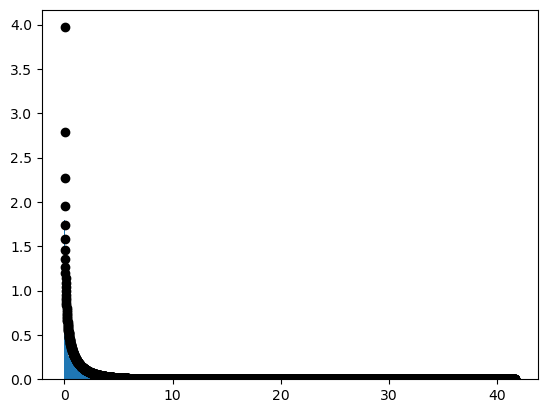

In [22]:
#
# [3 - ②] 독립성 검증 ★ 범주형 변수에 대한 것!!! ★ 기대빈도 가정, Eij 가 모두 5 이상이여야 함 !!!
# 
#        T = ∑ (Oij - Eij)² / Eij ~ K² (r-1)(c-1)    { Oij 는 관측값 /  Eij 는 기대값 / i,j 는 사건이나 확률변수 } 
#
# * 독립성
#   (1) 독립성이란 ? 하나의 확률 변수 또는 하나의 사건이 다른 확률 변수 또는 사건과 무관함. 
#       즉 하나의 변수로 다른 하나를 예측하거나 관계성이 없음. 상관성과 유사하나 범주형 변수에 대한 것임
#   (2) 사건의 독립     : P ( A ∩ B ) = P ( A ) * P ( B ) 라면 A, B 사건은 독립이다
#   (3) 확률변수의 독립 : 결함누적분포함수가 각각의 누적분포함수의 곱이라면 독립이다.  F (X, Y) = F ( X ) * F ( Y ) for all x, y
#

#  
# 독립성 검정의 검정 통계량과 카이제곱 분포 확인하기 ★ 무엇을 잘못한걸까? 분포를 따르지 않는다
#

import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

#  5 개의 범주로 이루어진 두 개의 범주형 변수간의 독립성 검증의 경우
# 임의의 값을 갖는 rows 5 , cols 5 인 table 생성 

def rand_T(rows, cols):
    # Random Generated Table
    table = np.zeros((rows, cols))
    for ridx in range(0, rows):
        for cidx in range(0, cols):
            table[ridx][cidx] = np.random.randint(low = 11, high = 50, size = 1)

    # Expected Value 
    expect = np.zeros((rows, cols))

    col_sum = np.zeros(cols)
    for cidx in range(0, cols):
        csum = 0
        for ridx in range(0, rows):
            csum = csum + table[ridx][cidx]
        col_sum[cidx] = csum

    row_sum = np.zeros(rows)
    for ridx in range(0, rows):
        rsum = 0
        for cidx in range(0, cols):
            rsum = rsum + table[ridx][cidx]
        row_sum[ridx] = rsum

    total = table.sum()
    
    flag = False
    for ridx in range(0, rows):
        for cidx in range(0, cols):
            ex = total * col_sum[cidx] / total * row_sum[ridx] / total
            if(ex <= 5):
                return None
            expect[ridx][cidx] = ex
    
    
    T = 0
    for ridx in range(0, rows):
        for cidx in range(0, cols):
            T = T + np.square(expect[ridx][cidx] - table[ridx][cidx]) / expect[ridx][cidx]
    return T

# T 통계량의 분포 보기
rows = 2
cols = 2
T = []
for i in range(0, 10000):
    t = rand_T(rows,cols)
    if(t != None):
        T = T + [t]
plt.hist(T, density=True, bins = 1000)

# 카이제곱 분포 보기
X = sp.chi2.rvs(df = (rows - 1) * (cols -1), size=1000)
X = np.arange(0, np.max(T), 0.01)
Y = sp.chi2.pdf(X, df = (rows - 1) * (cols -1))
plt.scatter(X,Y, color = 'black')

plt.show()


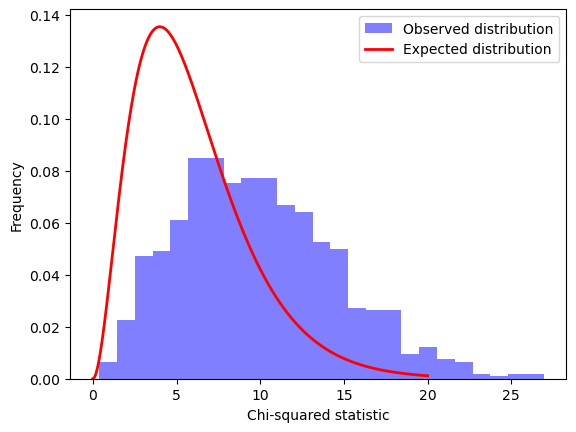

In [29]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

# 교차표 생성
n_samples = 1000 # 교차표 생성 횟수
n_rows, n_cols = 4, 3 # 행과 열의 카테고리 수
df = (n_rows - 1) * (n_cols - 1) # 검정 통계량 자유도
chi2_values = np.zeros(n_samples) # 검정 통계량 저장 배열

for i in range(n_samples):
    # 두 개의 범주형 변수를 가지는 교차표 생성
    obs = np.random.randint(5, 20, size=(n_rows, n_cols))
    # 예상되는 빈도 계산
    row_totals = np.sum(obs, axis=1)
    col_totals = np.sum(obs, axis=0)
    total = np.sum(obs)
    expected = np.outer(row_totals, col_totals) / total
    # 검정 통계량 계산
    t = np.sum((obs - expected)**2 / expected)
    chi2_values[i] = t # 검정 통계량 저장

# 검정 통계량 분포 시각화
fig, ax = plt.subplots()
ax.hist(chi2_values, bins=25, alpha=0.5, density = True, color='b', label='Observed distribution')
ax.set_xlabel('Chi-squared statistic')
ax.set_ylabel('Frequency')

# 실제 카이제곱 분포와 비교
x = np.linspace(0, 20, 500)
y = chi2.pdf(x, df)
ax.plot(x, y, 'r', lw=2, label='Expected distribution')
ax.legend()
plt.show()

In [5]:
#
# 흡연 데이터 사례
# 다음은 운동 선수 18명, 일반인 10명에 대하여 흡연 여부를 조사한 데이터이다. 운동
# 선수와 흡연 여부 간의 독립성 검정을 수행하시오.
#
#                Non‑smoker     Smoker     Total
# Athlete           14            4         18
# Non‑athlete       0            10         10
# Total            14            14         28
#

import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# (1) 가설 수립
# - 귀무가설 : 운동선수 여부와 흡연 여부는 독립이다
# - 대립가설 : 운동선수 여부와 흡연 여부는 독립이 아니다

# (2) Eij 의 계산 : 귀무가설의 참 일때 각 조건 조합의 기대값
# 
# - 28 X P(운동선수 ∩ 비흡연자 ) = 28 X P(운동선수) x P(비흡연자) = 28 X 18/28 X 14/28 = 9
# - 28 X P(운동선수 ∩ 흡연자 ) = 28 X P(운동선수) X P(흡연자) = 28 X 18/28 X 14/28 = 9
# - 28 X P(일반인 ∩ 비흡연자 ) = 28 X P(일반인) X P(비흡연자) = 28 X 10/28 X 14/28 = 5
# - 28 X P(일반인 ∩ 흡연자 ) = 28 X P(일반인) X P(흡연자) = 28 X 10/28 X 14/28 = 5
#
#                Non‑smoker           Smoker 
# Athlete           9                   9
# Non‑athlete       5                   5  

# (3) 검정통계량 구하기 : 관측치와 기대치의 차이
# ★ 귀무가설을 벗어날수록 (Oij - Eij가 클수록)  0 에서 멀어짐
# - T = (14 - 9)²/9 + (4-9)²/9 + (0 - 5)²/5 + (10 - 5)²/5 = 15.55

# (4) 카이제곱 분포에서 확인하기
# - 귀무가설 기각 (독립이 아니다)
p_value = 1 - sp.chi2.cdf(15.55, df = 1)    # 8.035164786845961e-05


# (5) 함수 활용해서 한번에 하기
#
# scipy.chi2_contingency(obervatin table)
# https://sosoeasy.tistory.com/602
# Params
# ------
#     - correction : bool, optional
#       If True, *and* the degrees of freedom is 1, apply Yates' correction
#       for continuity.  The effect of the correction is to adjust each
#       observed value by 0.5 towards the corresponding expected value.
#Returns
#-------
#    - chi2 : The test statistic.
#    - p : The p-value of the test
#    - dof : Degrees of freedom
#    - expected : ndarray, same shape as `observed`
#
#
df_obv = pd.DataFrame()
df_obv.index = ["althlete","non_althlete"]
df_obv["non_smoker"] = [14,0]
df_obv["smoker"] = [4,10]

T, p_value, dof, exp = sp.chi2_contingency(df_obv, correction=False) # ★ correction 설정 이유와 독립성 검정에 미치는 영향?
T, p_value, dof, exp

(15.555555555555555,
 8.011587656029359e-05,
 1,
 array([[9., 9.],
        [5., 5.]]))

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

# iris 데이터 불러오기
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 꽃잎 길이 이진 변수 생성
iris['Petal.Length.binary'] = ['short' if x <= 4.3 else 'long' for x in iris['petal_length']]

# 교차표 생성
ct = pd.crosstab(iris['Petal.Length.binary'], iris['species'])

# 독립성 검정 수행
chi2, p, dof, expected = chi2_contingency(ct)

# 검정 결과 출력
print('Chi-squared test')
print('================')
print(f'chi2 statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')
print(f'degrees of freedom: {dof}')i

Chi-squared test
chi2 statistic: 20.0000
p-value: 0.0671
degrees of freedom: 12


In [43]:
#
# [3 - ②] 기대 빈도 가정이 무너졌을 경우 독립성 검정
# - 초기하 분포를 기반으로 한 fisher's exact test 수행
# 

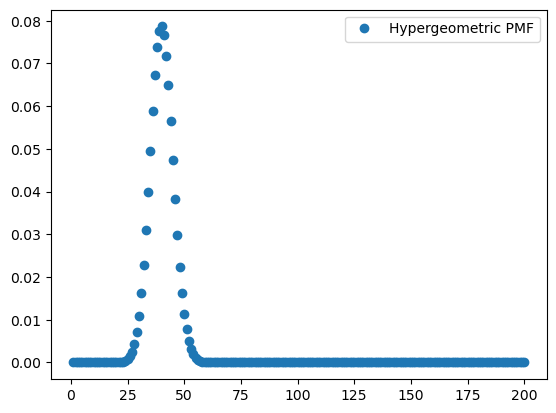

In [42]:
# 초기하 분포
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

# 1,000 개 모집단에서 K(200)개를 뽑았는데 x 개가 A 그룹(M = 200)에서 추출되었을 확률
N = 1000             # 전체 개수
M = 200              # 원하는 것의 개수
K = 200              # 추출 횟수
x = range(1, K + 1)  # 1 ~ 200 까지 정수
pmf = hypergeom.pmf(x, N, M, K)

# 히스토그램은 연속적인 데이터를 구간별로 나누어 그 분포를 시각화하는 방법입니다.
# 초기하 분포는 이산 확률 분포이므로 히스토그램보다는 확률질량함수(Probability Mass Function)를 
# 사용하여 그래프로 나타내는 것이 더 적합
plt.plot(x, pmf, 'o', label='Hypergeometric PMF')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import fisher_exact

# 동시확률 표 정의
table = [[8, 2],
         [1, 5]]

# Fisher's exact test 수행
oddsratio, pvalue = fisher_exact(table)

print(f'p-value: {pvalue}')

In [ ]:
# 동시확률 표 정의
table = [[8, 2],
         [1, 5]]

M = sum([sum(row) for row in table])
n = sum(table[0])
N = sum([row[0] for row in table])

rv = hypergeom(M, n, N)
x = table[0][0]
pvalue = rv.pmf(x)

print(f'Test statistic: {x}')
print(f'p-value: {pvalue}')

# 검정 통계량
# 검정 통계량은 테이블의 좌측 상단의 값으로 고정하는 이유는 
# Fisher’s exact test가 2x2 동시확률 표에서 두 변수 사이의 연관성을 검정하기 
# 위해 사용되기 때문입니다. 이 경우 검정 통계량은 테이블의 한 셀에 해당하는 값으로 선택됩니다.
# Fisher’s exact test는 다음과 같은 가정을 기반으로 합니다 
# 각 행과 열의 합계는 고정되어 있으며, 셀 값들은 독립적으로 이산 균등 분포를 따른다. 
# 이러한 가정 하에서, 우리는 초기하 분포를 사용하여 각 셀 값에 대한 확률을 계산할 수 있습니다.
# 따라서 검정 통계량은 초기하 분포의 확률 질량 함수를 사용하여 계산된 p-value와 함께 사용되어 
# 두 변수 사이에 유의미한 연관성이 있는지 여부를 결정합니다.

# 유의확률
# Fisher’s exact test에서 유의 확률은 초기하 분포의 확률 질량 함수 (pmf)를 사용하여 계산됩니다. 
# 초기하 분포의 pmf는 다음과 같이 정의됩니다
# P(X = k) = (n choose k) * ((N-n) choose (K-k)) / (N choose K)
# 여기서 N은 총 시행 횟수, n은 성공 확률이 있는 시행 횟수, K는 성공한 시행 횟수, 
# 그리고 k는 관찰된 성공 횟수입니다.
# (n choose x) = n! / (x! * (n-x)!)
# from scipy.special import comb
# result = comb(n, k)